Linear Regression - MAE: 12.27, MSE: 254.90, RMSE: 15.97, R²: 0.92
Ridge Regression - MAE: 7.95, MSE: 91.09, RMSE: 9.54, R²: 0.97


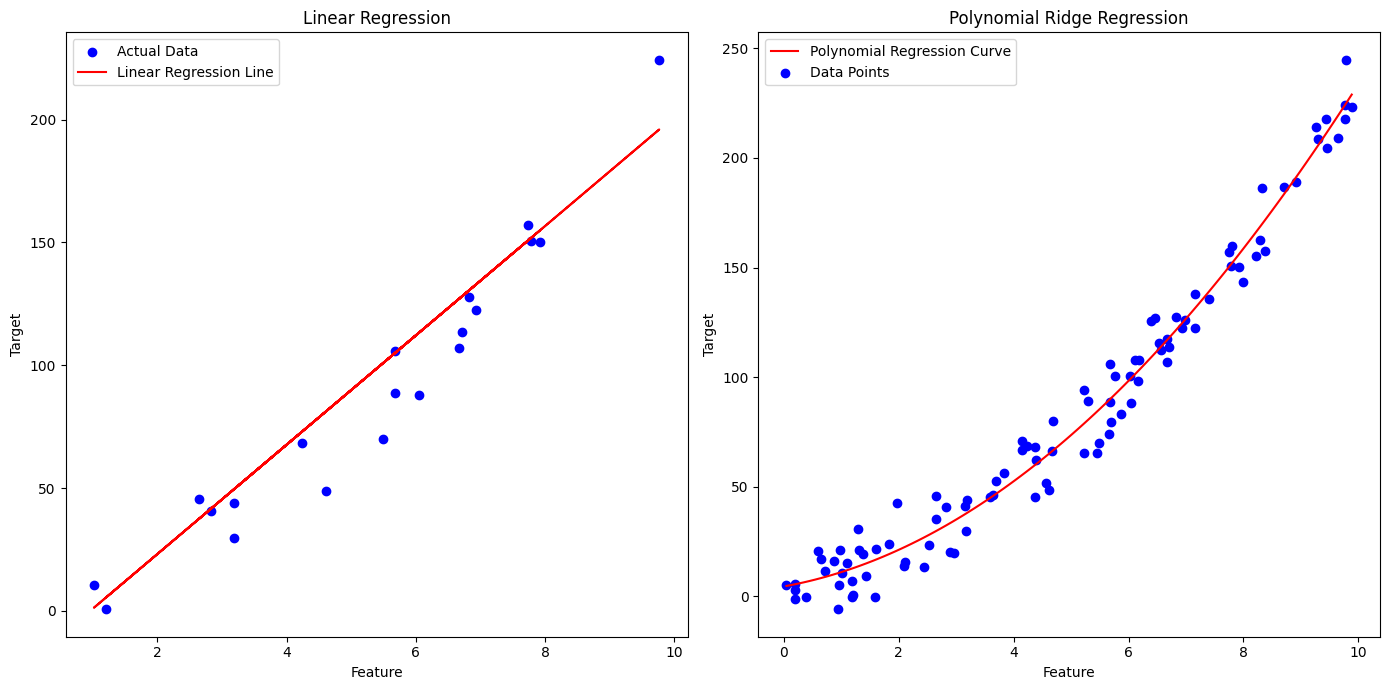

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data Generation (or load your dataset here)
# Creating a synthetic dataset with a polynomial relationship
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = 2 * (X.squeeze() ** 2) + 3 * X.squeeze() + 5 + np.random.randn(100) * 10  # Polynomial target with noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Initialize and train the Ridge regression model with polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test_poly)

# Model performance analysis for linear regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Model performance analysis for ridge regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display performance metrics
print(f"Linear Regression - MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}, R²: {r2_linear:.2f}")
print(f"Ridge Regression - MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}")

# Visualizing the results
plt.figure(figsize=(14, 7))

# Plotting Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()

# Plotting Polynomial Regression results
plt.subplot(1, 2, 2)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred_ridge = ridge_model.predict(x_range_poly)
plt.plot(x_range, y_range_pred_ridge, color='red', label='Polynomial Regression Curve')
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Ridge Regression')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 1.00
Confusion Matrix:
[[ 8  0]
 [ 0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



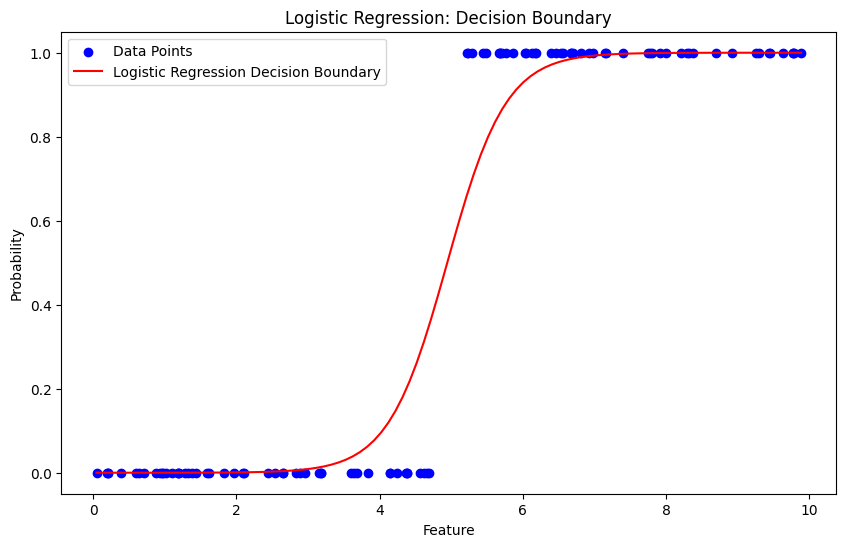

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data Generation (or load your dataset here)
# Creating a synthetic dataset for binary classification
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = (X.squeeze() > 5).astype(int)  # Target: 1 if feature > 5, else 0

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model performance analysis
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualizing the results
plt.figure(figsize=(10, 6))

# Plot the decision boundary
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_proba = model.predict_proba(x_range)[:, 1]  # Probability of positive class

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_range, y_proba, color='red', label='Logistic Regression Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression: Decision Boundary')
plt.legend()
plt.show()